<a href="https://colab.research.google.com/github/Abhishek54765/stroke_prediction/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Below 8 line of code are for to download dataset directly to the google drive and to unzip it. This step saves a lot of time for those using google collab on a regular basis.

In [ ]:
# import json
# import os

In [ ]:
# file = open('/content/drive/MyDrive/datasets/cotton_disease/Cotton Disease/train/kaggle.json')
# f = json.load(file)

In [ ]:
# f

In [ ]:
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/kaggle'

In [ ]:
# %cd /content/drive/My Drive/kaggle

In [ ]:
# os.environ['KAGGLE_USERNAME'] = "abhishekkumarsaini" # username from the json file
# os.environ['KAGGLE_KEY'] = "ed58dc4d33dd5ed05e33cf59aa9266ee" # key from the json file

In [ ]:
# !kaggle datasets download -d fedesoriano/stroke-prediction-dataset

In [ ]:
# !unzip \*.zip && rm *.zip 

# Importing some important libraries, loading the dataset and gaining some basic insights about the data. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/kaggle/healthcare-dataset-stroke-data.csv')

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data = data.drop('id', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

Seperating the categorical features from the other features and finding out the count of categories.

In [ ]:
for c in columns:
  if data[c].dtype == 'object':
    print(data[c].value_counts())
    print(" ")

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
 
Yes    3353
No     1757
Name: ever_married, dtype: int64
 
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
 
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
 
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
 


In [ ]:
data[data.bmi == 97.600]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0


In [ ]:
data = data.dropna(axis=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


 Droping only one value that is gender[other] which have only one value.

In [ ]:
data.drop(data[data.gender == 'Other'].index, inplace = True)

# **Exploratory data analysis uisng seaborn library.**

This shows that our dataset is very unbalanced. We should keep this in mind while building our model and selecting the performance matrics. We can do undersampling or oversampling for the unbalanced dataset.

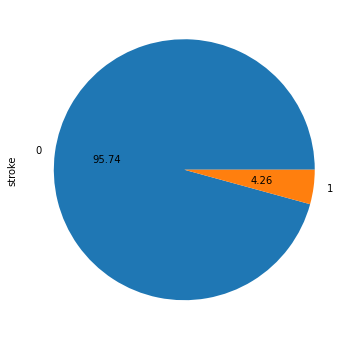

In [ ]:
data['stroke'].value_counts().plot(kind = 'pie', autopct="%.2f", figsize=(6,6))

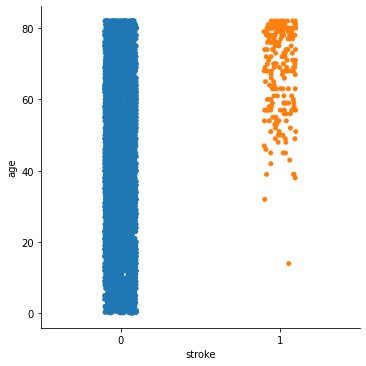

In [ ]:
sns.catplot(x='stroke',y='age',data= data)

This shows that most of the people getting the stroke are from the age group of 60 to 80.

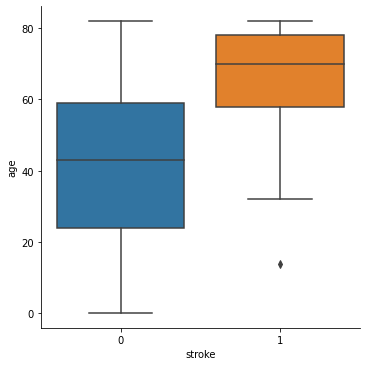

In [ ]:
sns.catplot(x='stroke', y='age', kind= 'box', data=data)

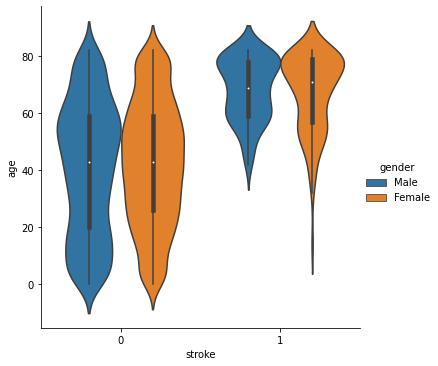

In [ ]:
sns.catplot(y="age", x="stroke", hue="gender",
            kind="violin", data=data)

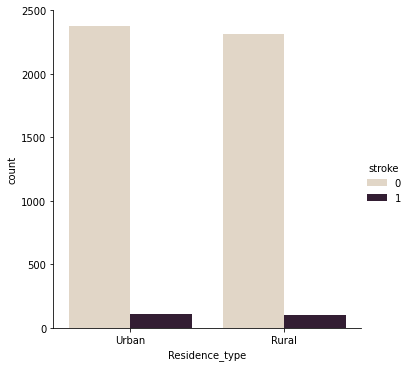

In [ ]:
sns.catplot(x="Residence_type", kind="count", palette="ch:.25", data=data, hue='stroke')

Conclusions:
1. people living in urban are getting more stroke.
2. people in private sector getting more strokes.


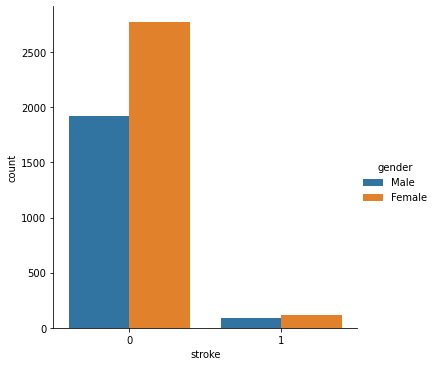

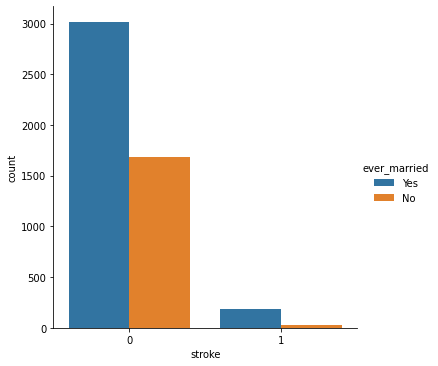

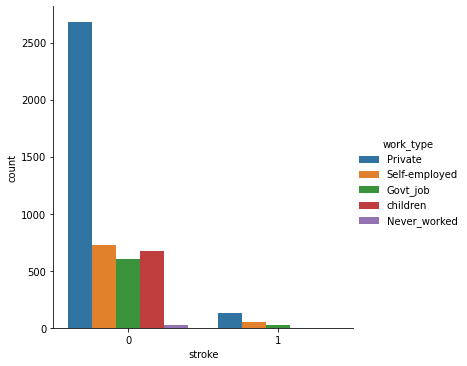

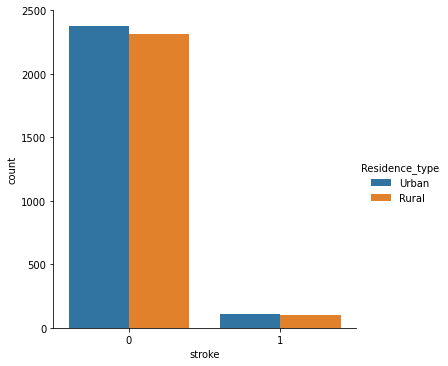

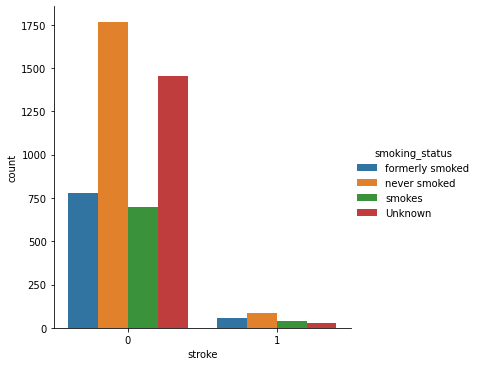

In [ ]:
for c in columns:
  if data[c].dtype == 'object':
    sns.catplot(x='stroke', kind='count',hue=c,data=data)

In [ ]:
corr = data.corr()
corr['stroke'].sort_values(ascending= False)

stroke               1.000000
age                  0.232313
hypertension         0.142503
avg_glucose_level    0.138984
heart_disease        0.137929
bmi                  0.042341
Name: stroke, dtype: float64

# Data preprocessing.

Listing out all categorical columns.

In [ ]:
categorical_columns = []
for c in columns:
  if data[c].dtype == 'object':
    categorical_columns.append(c)


In [ ]:
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

Train_Test split using stratified sampling. I used stratified sampling so that both train and test data gets same ratio of positive and negative class data.

---



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test, Y_train, Y_test = train_test_split(data, data['stroke'], test_size=.25, stratify=data['stroke'])

In [ ]:
X_train['stroke'].value_counts()

0    3524
1     157
Name: stroke, dtype: int64

In [ ]:
X_test['stroke'].value_counts()

0    1175
1      52
Name: stroke, dtype: int64

In [ ]:
X_train = X_train.drop('stroke', axis=1)

In [ ]:
X_test = X_test.drop('stroke', axis=1)

In [ ]:
numerical_columns = []
for c in X_train.columns:
  if X_train[c].dtype in ['float64','int64']:
    numerical_columns.append(c)

In [ ]:
numerical_columns

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

Creating a function that will convert all categorical features into the dummy variables. It is like one_hot encoding.

In [ ]:
def make_dummy(b, colm):
  return pd.get_dummies(b, columns= colm)

In [ ]:
X_train = make_dummy(X_train, categorical_columns)

In [ ]:
X_train.shape

(3681, 20)

In [ ]:
X_test = make_dummy(X_test, categorical_columns)

In [ ]:
X_test.shape

(1227, 20)

Standardizing both test and train data so that model training becomes fast.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler() 

In [ ]:
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)

In [ ]:
Y_true_train = Y_train==1
Y_true_test = Y_test==1

Below what we are going to do is that training different classifier model and will compute recall value. I have selected the recall as the performance matrics because no person should me miss diagnosed as he/she will not  have stroke.
# note 
first i will do this step before doing any type of sampling. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
models = {'dt_clf':DecisionTreeClassifier(), 'for_clf':RandomForestClassifier(), 'k_clf':KNeighborsClassifier(), 'logistic_reg':LogisticRegression(), 'ada_boost': AdaBoostClassifier()}

In [ ]:
results = []
for key in models:
  model_name = models[key]
  model = model_name
  model.fit(X_train, Y_train)
  pred = model.predict(X_test)

  # pred = model_name.predict(X_test)
  print('')
  print(key)
  print(confusion_matrix(Y_true_test, pred),'recall=', metrics.recall_score(Y_true_test, pred))


dt_clf
[[1119   56]
 [  44    8]] recall= 0.15384615384615385

for_clf
[[1174    1]
 [  51    1]] recall= 0.019230769230769232

k_clf
[[1173    2]
 [  50    2]] recall= 0.038461538461538464

logistic_reg
[[1175    0]
 [  51    1]] recall= 0.019230769230769232

ada_boost
[[1175    0]
 [  52    0]] recall= 0.0


Performing oversampling. I have selected oversampling because the amount of data available is very less.

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
smk = SMOTETomek(random_state=42)
X_res,Y_res=smk.fit_sample(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Y_true_train_res = Y_res ==1

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y_train)))
print('Resampled dataset shape {}'.format(Counter(Y_res)))

Original dataset shape Counter({0: 3524, 1: 157})
Resampled dataset shape Counter({0: 3505, 1: 3505})


This shows that logistic regression and ada boost is having descent recall score.

In [ ]:
results = []
for key in models:
  model_name = models[key]
  model = model_name
  model.fit(X_res, Y_res)
  pred = model.predict(X_test)

  # pred = model_name.predict(X_test)
  print('')
  print(key)
  print(confusion_matrix(Y_true_test, pred),'recall=', metrics.recall_score(Y_true_test, pred))


dt_clf
[[1050  125]
 [  40   12]] recall= 0.23076923076923078

for_clf
[[1125   50]
 [  45    7]] recall= 0.1346153846153846

k_clf
[[1015  160]
 [  34   18]] recall= 0.34615384615384615

logistic_reg
[[892 283]
 [  8  44]] recall= 0.8461538461538461

ada_boost
[[954 221]
 [ 15  37]] recall= 0.7115384615384616


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

In [ ]:
ada = AdaBoostClassifier()
log_reg = LogisticRegression()

In [ ]:
ada.fit(X_res, Y_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
log_reg.fit(X_res, Y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

decision function of the model returns the probabilities.

In [ ]:
y_score = cross_val_predict(log_reg, X_res, Y_true_train_res, cv=3, method='decision_function')

In [ ]:
y_score.shape

(7010,)

Plotting precision and recall against threshold values for logistic regression model. 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(Y_true_train_res, y_score)

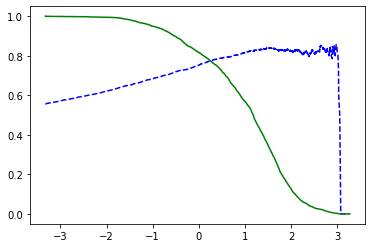

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')
  plt.plot(thresholds, recalls[:-1], 'g-', label = 'recall')
  [...]
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()  


Plotting precision and recall against threshold values for logistic regression model. 

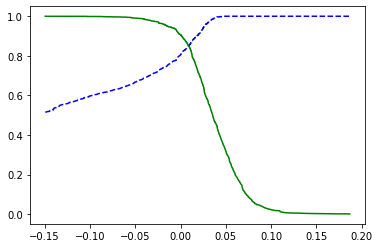

In [ ]:
y_score_ada = cross_val_predict(ada, X_res, Y_true_train_res, cv=3, method='decision_function')
precisions_ada, recalls_ada, thresholds_ada = precision_recall_curve(Y_true_train_res, y_score_ada)
def plot_precision_recall_vs_threshold(precisions_ada, recalls_ada, thresholds_ada):
  plt.plot(thresholds_ada, precisions_ada[:-1], 'b--', label = 'precision')
  plt.plot(thresholds_ada, recalls_ada[:-1], 'g-', label = 'recall')
  [...]
plot_precision_recall_vs_threshold(precisions_ada, recalls_ada, thresholds_ada)
plt.show()  

In [ ]:
threshold = 0
log_scores = log_reg.decision_function(X_res)
log_pred_threshold = log_scores>threshold

In [ ]:
threshold_2 = 0
ada_scores = ada.decision_function(X_res)
ada_pred_threshold = ada_scores>threshold_2

In [ ]:
ada_pred_threshold

array([False, False, False, ...,  True,  True, False])

In [ ]:
log_pred_threshold

array([False, False, False, ...,  True,  True, False])

calculating precision and recall score on logistic regression model with threshold being 0 that is selected from the precision - recall curve against the different threshold values. 

In [ ]:
metrics.recall_score(Y_true_train_res, log_pred_threshold)

0.818830242510699

In [ ]:
metrics.precision_score(Y_true_train_res, log_pred_threshold)

0.7566569997363565

In [ ]:
metrics.confusion_matrix(Y_true_train_res, log_pred_threshold)

array([[2582,  923],
       [ 635, 2870]])

calculating precision and recall score on ada boost model model with threshold being 0 that is selected from the precision - recall curve against the different threshold values.

In [ ]:
metrics.recall_score(Y_true_train_res, ada_pred_threshold)

0.9215406562054208

In [ ]:
metrics.precision_score(Y_true_train_res, ada_pred_threshold)

0.82000507743082

In [ ]:
metrics.confusion_matrix(Y_true_train_res, ada_pred_threshold)

array([[2796,  709],
       [ 275, 3230]])

From above testing, scores of ada boost classifier model is very promising. It is giving descent recall and precision score.

Now let's evaluate our models on test data too.

In [ ]:
threshold_2 = 0
ada_scores_test = ada.decision_function(X_test)
ada_pred_test_threshold = ada_scores_test>threshold

In [ ]:
metrics.confusion_matrix(Y_true_test, ada_pred_test_threshold)

array([[954, 221],
       [ 15,  37]])

In [ ]:
metrics.recall_score(Y_true_test, ada_pred_test_threshold)

0.7115384615384616

In [ ]:
metrics.precision_score(Y_true_test, ada_pred_test_threshold)

0.1434108527131783

In [ ]:
threshold_2 = 0
log_scores_test = log_reg.decision_function(X_test)
log_pred_test_threshold = log_scores_test>threshold_2

In [ ]:
metrics.recall_score(Y_true_test, log_pred_test_threshold)

0.8461538461538461

In [ ]:
metrics.precision_score(Y_true_test, log_pred_test_threshold)

0.1345565749235474

Conclusions:
It seems that our ada boost clasifier was over fitting over our training data, whereas logistics regression model perfomed well comparatively.
We can tune our model to achieve better recall and precision score.

# Any suggestions and corrections are warmly welcomed.
# Thankyou!